## Dimentionality Reduction

1. **Motivations and Drawbacks of Dimensionality Reduction**
   The primary motivations for reducing a dataset's dimensionality are:
   - To speed up subsequent training algorithms.
   - To remove noise and redundant features, which can improve the performance of machine learning models.
   - To reduce the complexity of the model and the risk of overfitting.
   - To require less disk/network space.
   - To visualize high-dimensional data in two or three dimensions.
   
   The main drawbacks include:
   - Potential loss of information, which can lead to a decrease in performance of subsequent machine learning models.
   - It can be computationally intensive to perform dimensionality reduction itself.
   - The transformed features are often less interpretable than the original features.

2. **The Curse of Dimensionality**
   The curse of dimensionality refers to various phenomena that arise when analyzing and organizing data in high-dimensional spaces. Some of these issues include:
   - The volume of the space increases exponentially, making data sparse. This sparsity is problematic for any method that requires statistical significance.
   - Many algorithms rely on measuring distances between data points, and in high-dimensional spaces, all distances tend to become equally far apart, reducing the usefulness of distance measurements.
   - The probability distribution of the data becomes more difficult to estimate because the amount of data needed to generalize accurately grows exponentially with the number of dimensions.

3. **Reversibility of Dimensionality Reduction**
   Dimensionality reduction is not always reversible. Linear methods like PCA can be partially reversed if the reduction did not discard any components, but information loss during reduction typically means that the operation cannot be fully reversed. Nonlinear techniques, especially those that involve random processes or complex mappings, are even less likely to be reversible.

4. **PCA for Nonlinear Dimensionality Reduction**
   PCA is not suitable for reducing the dimensionality of highly nonlinear datasets because it is a linear method. Nonlinear dimensionality reduction techniques like kernel PCA, t-SNE, or autoencoders are better suited for this purpose.

5. **Dimensions After PCA with 95% Variance**
   The number of dimensions in the dataset after PCA with 95% explained variance depends on the dataset itself. PCA selects the minimum number of principal components such that the cumulative explained variance ratio reaches 95%. This number is not fixed and can vary widely from one dataset to another.

6. **When to Use Different PCA Techniques**
   - Use **vanilla PCA** when the dataset is not too large and can fit into memory.
   - Use **Incremental PCA** for large datasets that don’t fit into memory, processing chunks of the data at a time.
   - Use **Randomized PCA** for very large high-dimensional datasets, as it is much faster than the previous methods, but less accurate.
   - Use **Kernel PCA** for nonlinear dimensionality reduction.

7. **Evaluating the Performance of Dimensionality Reduction**
   You can evaluate the performance of a dimensionality reduction algorithm by:
   - Checking how much variance is retained in the reduced dataset.
   - Using the reduced dataset to train machine learning models and evaluating their performance on a held-out test set.
   - Visualizing the reduced dataset to see if the algorithm maintains the structure of the data.

8. **Chaining Dimensionality Reduction Algorithms**
   It can make sense to chain different dimensionality reduction algorithms when:
   - The first algorithm (e.g., PCA) is used to quickly remove a lot of dimensions, while the second algorithm (e.g., t-SNE) creates a more nuanced reduction and is applied on a smaller scale.
   - Different algorithms may capture different structures and aspects of the data, and chaining them might lead to better performance for specific tasks.


8. 

In [1]:
import time
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"]

In [3]:
# Split into training and test sets
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [5]:
# Train RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42)
#start = time.time()
%timeit rf_clf.fit(X_train, y_train)
#end = time.time()
#print(f"Training RandomForestClassifier took {end - start:.2f} seconds")

36.2 s ± 81.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [6]:
# Evaluate on the test set
y_pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {accuracy:.2f}")

Accuracy on test set: 0.97


In [10]:
# Apply PCA to reduce dimensionality
pca = PCA(n_components=400)
pca.fit_transform(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [11]:
pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(X_train)

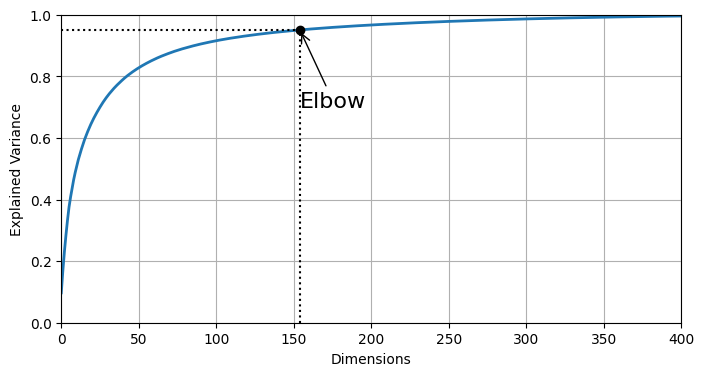

In [12]:
# Plot the explained variance
plt.figure(figsize=(8,4))
plt.plot(cumsum, linewidth=2)
plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate('Elbow', xy=(d, 0.95), xytext=(d, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)
plt.show()

In [10]:
# Train a new RandomForestClassifier on the reduced dataset
rf_clf_reduced = RandomForestClassifier(random_state=42)
#start_reduced = time.time()
%timeit rf_clf_reduced.fit(X_train_reduced, y_train)
#end_reduced = time.time()
#print(f"Training RandomForestClassifier on reduced data took {end_reduced - start_reduced:.2f} seconds")


CPU times: user 1min 43s, sys: 86.1 ms, total: 1min 43s
Wall time: 1min 44s


RandomForestClassifier(random_state=42)

In [8]:
# Evaluate the new classifier on the test set
X_test_reduced = pca.transform(X_test)
y_pred_reduced = rf_clf_reduced.predict(X_test_reduced)
accuracy_reduced = accuracy_score(y_test, y_pred_reduced)
print(f"Accuracy on test set with reduced data: {accuracy_reduced:.2f}")

Accuracy on test set with reduced data: 0.95


In [ ]:
# Compare the performance
print("Performance comparison:")
print(f"Original data training time: {end - start:.2f} seconds")
print(f"Reduced data training time: {end_reduced - start_reduced:.2f} seconds")
print(f"Original data accuracy: {accuracy:.2f}")
print(f"Reduced data accuracy: {accuracy_reduced:.2f}")


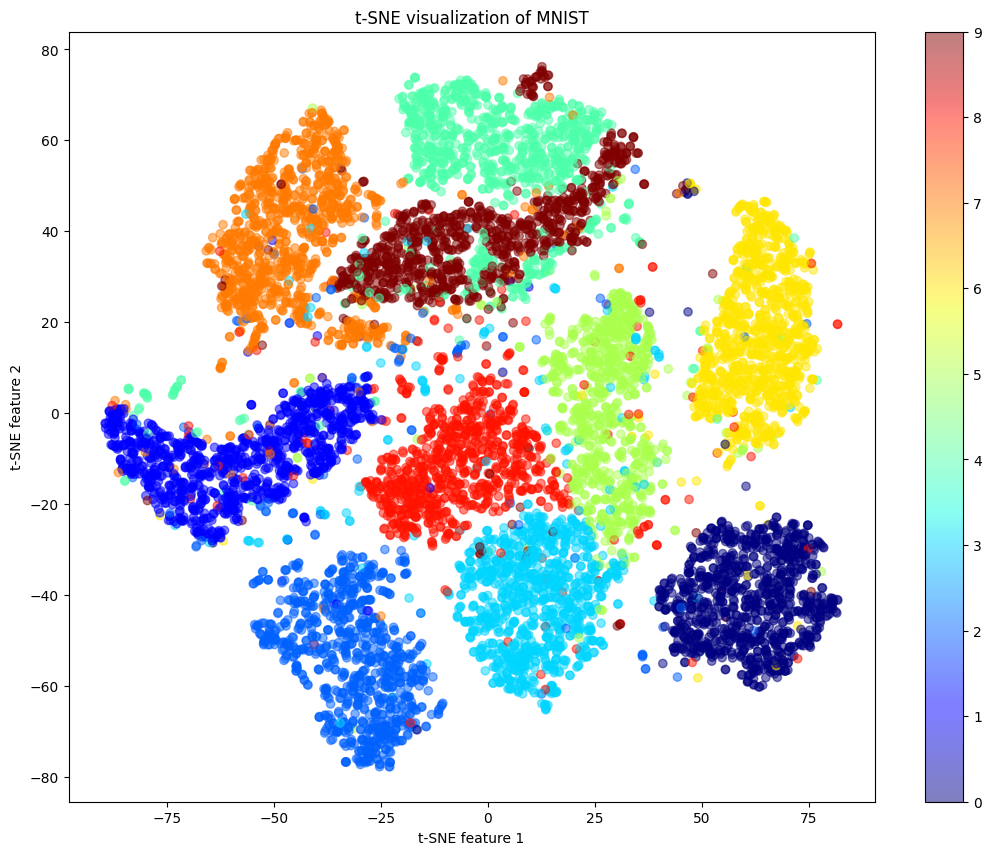

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.manifold import TSNE

# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target

# Since t-SNE can be quite slow on the full dataset, we'll use a subset
# (You could use more samples to improve the visualization, but it will be slower)
X_subset = X[:10000]
y_subset = y[:10000]

# Use t-SNE to reduce dimensionality
tsne = TSNE(n_components=2, random_state=42)
X_reduced = tsne.fit_transform(X_subset)

# Plot the result
plt.figure(figsize=(13,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_subset.astype(int), cmap="jet", alpha=0.5)
plt.colorbar()
plt.title('t-SNE visualization of MNIST')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.show()


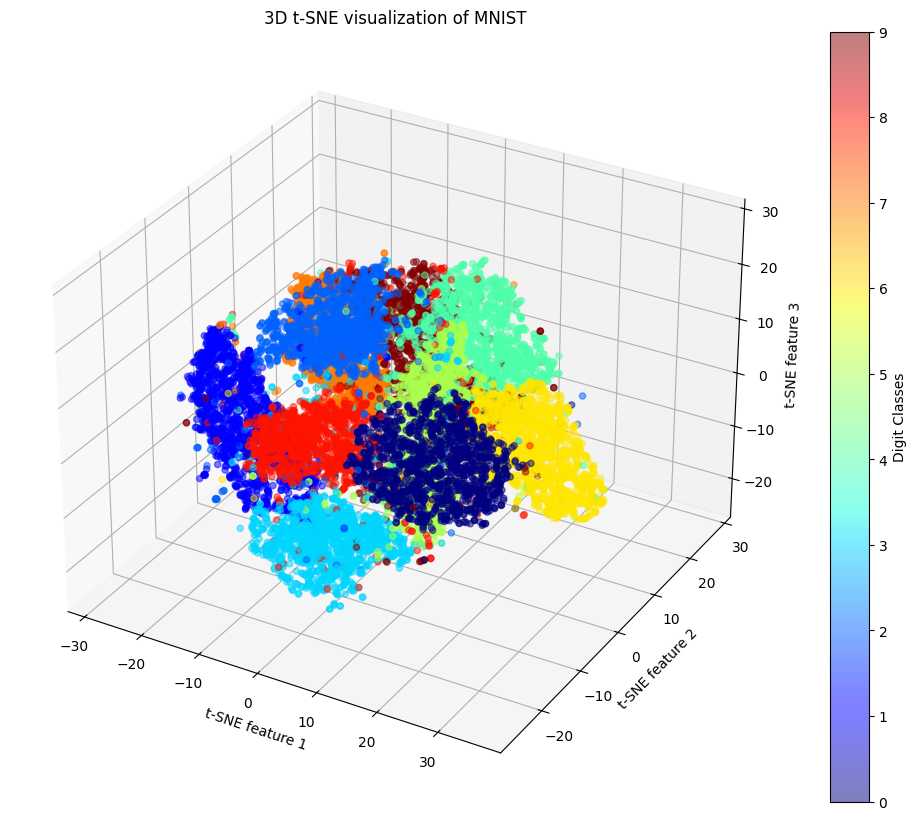

In [3]:
# Since t-SNE can be quite slow on the full dataset, we'll use a subset
# (You could use more samples to improve the visualization, but it will be slower)
X_subset = X[:15000]  # Reduced the subset further for faster execution
y_subset = y[:15000]

# Use t-SNE to reduce dimensionality
tsne = TSNE(n_components=3, random_state=42)
X_reduced = tsne.fit_transform(X_subset)

# Plot the result
fig = plt.figure(figsize=(13,10))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y_subset.astype(int), cmap="jet", alpha=0.5)

# Create a color bar and set its label
colorbar = plt.colorbar(sc)
colorbar.set_label('Digit Classes')

ax.set_title('3D t-SNE visualization of MNIST')
ax.set_xlabel('t-SNE feature 1')
ax.set_ylabel('t-SNE feature 2')
ax.set_zlabel('t-SNE feature 3')
plt.show()

In [9]:
from sklearn.random_projection import GaussianRandomProjection
from sklearn.decomposition import KernelPCA
from sklearn.manifold import MDS, Isomap, LocallyLinearEmbedding
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import time
from tqdm import tqdm

# Load a subset of the MNIST dataset for speed
X_subset, y_subset = X[:7000], y[:7000]

# Split the indices first to maintain consistency across runs
train_idx, test_idx = train_test_split(range(len(X_subset)), test_size=0.3, random_state=42)

# Initialize classifiers and reduction algorithms
rp = GaussianRandomProjection(n_components=50, random_state=42)
mds = MDS(n_components=2, n_jobs=2, random_state=42)
isomap = Isomap(n_components=2, n_jobs=2)
lda = LinearDiscriminantAnalysis(n_components=2)
lle = LocallyLinearEmbedding(n_components=2, n_jobs=2, random_state=42)
kernel_pca = KernelPCA(n_components=2, kernel="rbf", n_jobs=2, random_state=42)
tsne = TSNE(n_components=2, n_jobs=2, random_state=42)
rf_clf = RandomForestClassifier(n_jobs=-1, random_state=42)

# Dictionary of dimensionality reduction algorithms
dr_algorithms = {
    'Random Projection': rp,
    'MDS': mds,
    'Isomap': isomap,
    'LDA': lda,
    'LLE': lle,
    'Kernel PCA': kernel_pca,
    't-SNE': tsne,
}

# Dictionary to store the results
results = {}

# Split the indices first to maintain consistency across runs
train_idx, test_idx = train_test_split(range(len(X_subset)), test_size=0.25, random_state=42)

# Now we will use these indices to split the dataset after dimensionality reduction
for dr_name, dr_algorithm in tqdm(dr_algorithms.items()):
    
    start = time.time()
    
    # Reduce the whole subset
    X_reduced = dr_algorithm.fit_transform(X_subset, y_subset)
    
    # Separate the reduced data into training and test sets using the predetermined indices
    X_train_reduced = X_reduced[train_idx]
    y_train = y_subset[train_idx]
    X_test_reduced = X_reduced[test_idx]
    y_test = y_subset[test_idx]
    
    # Train RandomForestClassifier
    rf_clf.fit(X_train_reduced, y_train)
    
    # Predict and evaluate accuracy
    y_pred = rf_clf.predict(X_test_reduced)
    end = time.time()
    
    # Store the results
    results[dr_name] = {
        'time': end - start,
        'accuracy': accuracy_score(y_test, y_pred)
    }



  0%|          | 0/7 [00:00<?, ?it/s]

 14%|█▍        | 1/7 [00:02<00:14,  2.36s/it]

: 

In [8]:
results

{'Random Projection': {'time': 3.0747411251068115,
  'accuracy': 0.8580952380952381},
 'MDS': {'time': 745.0049409866333, 'accuracy': 0.4838095238095238},
 'Isomap': {'time': 24.40280532836914, 'accuracy': 0.51},
 'LDA': {'time': 1.8881454467773438, 'accuracy': 0.5638095238095238},
 'LLE': {'time': 5.214496612548828, 'accuracy': 0.8319047619047619},
 'Kernel PCA': {'time': 3.5161523818969727, 'accuracy': 0.10761904761904761},
 't-SNE': {'time': 50.00290393829346, 'accuracy': 0.9471428571428572}}